<a href="https://colab.research.google.com/github/roklp/MLP34/blob/main/240314.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
/content/drive/MyDrive/data/머신러닝/data/final_reordered (1).csv

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/data/머신러닝/data/final_reordered (1).csv"
data = pd.read_csv(file_path)

# 데이터 구조 확인
print(data.head())

# 데이터 정보 확인
print(data.info())

# 기초 통계량 확인
print(data.describe())

In [ ]:
import pandas as pd

# 데이터 불러오기
data_path = "/content/drive/MyDrive/data/머신러닝/data/final_reordered (1).csv"
data = pd.read_csv(data_path)

# 상관 행렬 계산
correlation_matrix = data.corr()

# 결과 출력
print(correlation_matrix)


In [20]:
import pandas as pd

correlation_matrix = data.corr()

# 시간대 매출금액과의 상관관계 확인
correlation_with_sales = correlation_matrix['시간대_매출금액']

#임계값 설정
threshold = 0.5

high_correlation_variables = correlation_with_sales[correlation_with_sales.abs() > threshold].index.tolist()

print("시간대 매출금액과의 상관계수가 {} 이상인 변수: {}".format(threshold, high_correlation_variables))


시간대 매출금액과의 상관계수가 0.5 이상인 변수: ['시간대_매출금액', '시간대_유동인구_수', '평일_유동인구_수_평균', '주말_유동인구_수_평균', '총_직장_인구_수', '집객시설_수']


<ipython-input-20-04a9b4584cb7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
numeric_data = data.select_dtypes(include=[np.number])

z_scores = np.abs(stats.zscore(numeric_data))

outliers_count = np.sum(z_scores >= 3)

print("이상치로 간주될 수 있는 데이터의 개수:", outliers_count)

In [ ]:
outliers_indices = np.where(z_scores >= 3)

outliers_data = data.iloc[outliers_indices]

print(outliers_data)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='시간대', y='시간대_매출금액', data=data)
plt.xticks(rotation=45)
plt.title('시간대별 매출금액 분포')
plt.show()

sns.barplot(x='상권_구분_코드_명', y='시간대_매출금액', hue='시간대', data=data)
plt.xticks(rotation=45)
plt.title('상권 유형에 따른 시간대별 매출금액')
plt.show()

sns.scatterplot(x='총_직장_인구_수', y='시간대_매출금액', data=data)
plt.title('직장 인구 수와 시간대별 매출금액 관계')
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 종속 변수와 독립 변수 선택
X = data[['시간대_유동인구_수', '평일_유동인구_수_평균', '주말_유동인구_수_평균', '총_직장_인구_수', '집객시설_수']]
y = data['시간대_매출금액']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 선택 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("평균 제곱 오차(MSE):", mse)
print("결정 계수(R^2):", r2)


평균 제곱 오차(MSE): 8.868235239486872e+16
결정 계수(R^2): 0.7070222313165462


In [17]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)  # 정규화 강도를 조절
ridge_model.fit(X_train_encoded, y_train)

y_pred_ridge = ridge_model.predict(X_test_encoded)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("평균 제곱 오차(MSE) - Ridge:", mse_ridge)
print("결정 계수(R^2) - Ridge:", r2_ridge)
print("회귀 계수(coefficients) - Ridge:", ridge_model.coef_)


평균 제곱 오차(MSE) - Ridge: 2.2154208644271556e+16
결정 계수(R^2) - Ridge: 0.9268096702414276
회귀 계수(coefficients) - Ridge: [ 4.12060140e+07  2.28448755e+07 -2.58692948e+03  0.00000000e+00
  2.12319309e+06  1.01553671e+03  3.46194995e+03 -3.36320778e+03
 -3.75390525e+03 -5.45583071e+04  4.67460951e+04  2.16892743e+06
  2.83540042e+01  1.68463855e+06 -1.13662295e-02 -2.05799531e+08
  9.22833340e+06 -9.71674499e+05 -5.17660727e+07  1.56235876e+08
  9.30730684e+07 -8.13338760e+06  7.19307191e+06  3.62901330e+05
  5.77414353e+05 -8.13338760e+06  5.77414353e+05  7.19307191e+06
  3.62901330e+05 -1.28169310e+07  5.77414353e+05  3.62901330e+05
  5.04085519e+07 -1.64720167e+08 -3.59960555e+07  2.04544974e+08
  3.20812502e+05 -8.57909842e+07 -8.33534591e+07  2.98517417e+08
 -2.09122301e+08  4.30682658e+06 -6.07715492e+07  7.79511959e+07
 -1.51343088e+08  2.18432176e+07  1.38255807e+07 -1.31412410e+08
 -1.53617225e+08 -6.21179110e+07 -1.53465519e+08  1.92515652e+08
  1.06982834e+08 -1.08727949e+08 -4.86807

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.48258e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 주어진 회귀 계수
coefficients = [4.10555738e+07, 2.29412944e+07, -2.54697962e+03, -7.46513549e+00,
                2.12738992e+06, 1.01532221e+03, 3.41511570e+03, -3.30099331e+03,
                -3.67147696e+03, -5.81839595e+04, 3.95319386e+04, 2.19276099e+06,
                2.97269109e+01, -6.06232788e+05, -8.46743584e-04, -2.05837888e+08,
                9.28195726e+06, -9.85757070e+05, -5.17947286e+07, 1.56253575e+08,
                9.30828416e+07, -6.93392046e+06, 7.95024575e+06, -1.35294788e+06,
                3.36622588e+05, -6.93392046e+06, 3.36622588e+05, 7.95024575e+06,
                -1.35294788e+06, -1.46377424e+07, 3.36622588e+05, -1.35294788e+06,
                5.08562295e+07, -1.68670727e+08, -3.83299386e+07, 2.06809480e+08,
                7.77209644e+06, -8.14046362e+07, -8.12548198e+07, 2.94993566e+08,
                -1.94374390e+08, 5.80260175e+06, -6.32437964e+07, 7.74451811e+07,
                -1.64229382e+08, 2.50612600e+07, -5.66970181e+05, -1.33075871e+08,
                -1.49598864e+08, -6.16765107e+07, -1.62629694e+08, 2.02083652e+08,
                1.09441203e+08, -1.06892548e+08, -4.96877388e+08, -4.38934465e+07,
                -1.11475462e+07, 3.63533173e+08, -9.71997458e+06, -1.56760050e+07,
                1.32665171e+08, 2.18933806e+07, 1.26232635e+08, -2.65292921e+08,
                1.40421093e+08, 1.20849184e+08, -1.22211062e+08, 1.50446594e+08,
                1.31078998e+08, -1.76096312e+08, -3.69646261e+08, 1.16720711e+07,
                -5.63159741e+07, 2.88984409e+07, -1.94509394e+08, 2.62918661e+07,
                5.20175340e+08, -2.32110426e+08, 7.60473915e+07, 3.38250666e+07,
                4.89374783e+08, 7.15534209e+07, 6.97745223e+07, -3.04373286e+08,
                5.20410804e+05, 4.17093897e+07, 7.26010478e+07, 3.13288768e+08,
                -4.73549986e+07, -1.56290809e+08, 0.00000000e+00, -8.27575841e+07,
                -5.69207838e+07, 1.41957104e+08, 2.44242860e+07, -6.16765107e+07,
                -2.36256378e+07, -1.07567655e+07, -1.11475462e+07, -4.38934465e+07,
                4.47151652e+07, -1.42058812e+08, 3.38250666e+07, 1.50446594e+08,
                -7.09952357e+07, 1.79433087e+07, 1.90499716e+07, -3.05578422e+07,
                -5.66970181e+05, 1.02595638e+08]

# 변수 이름 리스트
variable_names = ['시간대_매출금액', '시간대_유동인구_수', '평일_유동인구_수_평균', '주말_유동인구_수_평균', '총_직장_인구_수', '집객시설_수']


'!mv'

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarn

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  func(

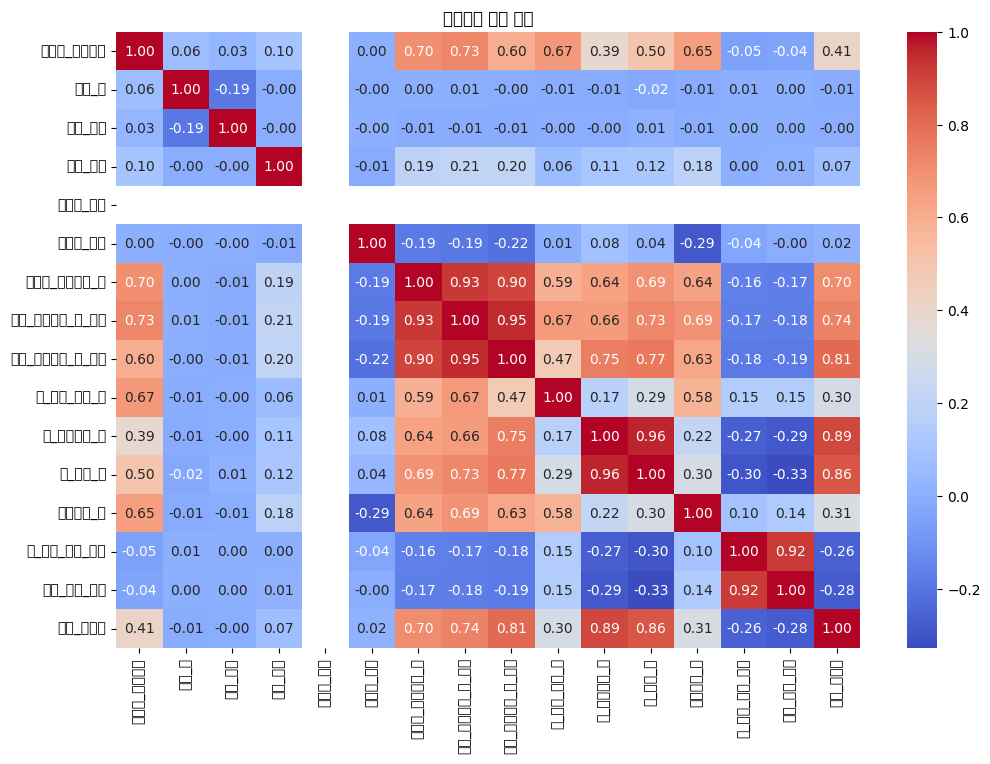

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 예시로 'Malgun Gothic' 사용

# 데이터 불러오기
data = pd.read_csv("/content/drive/MyDrive/data/머신러닝/data/final_reordered (1).csv")

# 문자열 열 제거
data_numeric = data.select_dtypes(include=[np.number])

# 변수들의 상관 행렬을 DataFrame으로 변환
correlation_matrix = pd.DataFrame(np.corrcoef(data_numeric.values.T), columns=data_numeric.columns, index=data_numeric.columns)

# 상관 행렬 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('변수들의 상관 행렬')
plt
